In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install seaborn

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
df_last = pd.read_csv("주택도시보증공사_전국 평균 분양가격(2019년 12월).csv", encoding="cp949")
df_first = pd.read_csv("전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv", encoding="cp949")


In [4]:
df_last.info()
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-nu

## 1.4.4 결측치 보기

* isnull 혹은 isna를 통해 데이터가 비어있는지를 확인할 수 있음
* 결측치는 True로 표시되는데, True == 1 이기 때문에 이 값을 다 더해주면 결측치의 수가 됨

In [5]:
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

## 1.4.5 데이터 타입 변경

In [6]:
df_last["분양가격"] =  pd.to_numeric(df_last["분양가격(㎡)"], errors = 'coerce')

In [7]:
df_last["분양가격"].mean()

3238.128632802628

## 1.4.6 평당분양가격 구하기

* 2013년부터의 데이터는 평당 분양가격 기준으로 되어 있음
* 분양가격을 평당 기준으로 보기 위해 3.3을 곱해서 "평당분양가격" 컬럼을 만들어 추가

In [8]:
df_last["평당분양가격"] = df_last["분양가격"] * 3.3

In [9]:
df_last

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7
...,...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882,3882.0,12810.6
4331,제주,전용면적 60㎡이하,2019,12,NaN,NaN,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898,3898.0,12863.4
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,NaN,NaN


## 1.4.7 분양가격 요약하기

In [10]:
df_last["분양가격(㎡)"].describe()

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [11]:
df_first.describe()

,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,8059.294118,8129.882353,8194.882353,8204.117647,8289.294118,8357.764706,8343.529412,8333.117647,8395.470588,8458.529412,...,8569.235294,8583.470588,8604.529412,8602.000000,8563.294118,8612.823529,8623.705882,8627.294118,8643.117647,8678.117647
std,2985.441169,2891.547637,2913.018685,2928.369339,2899.477125,3176.545225,3030.696065,2985.921735,3097.731773,3108.094073,...,3272.615631,3268.314839,3352.480520,3346.236468,3067.717877,2935.197677,2849.085111,2835.948425,2771.915242,2844.704266
min,5678.000000,5678.000000,5678.000000,5696.000000,5736.000000,5656.000000,5609.000000,5780.000000,5685.000000,5804.000000,...,5768.000000,5784.000000,5784.000000,5833.000000,5825.000000,5940.000000,6050.000000,6243.000000,6286.000000,6289.000000
25%,6282.000000,6365.000000,6379.000000,6317.000000,6552.000000,6591.000000,6587.000000,6586.000000,6586.000000,6719.000000,...,6881.000000,6989.000000,6976.000000,6953.000000,6997.000000,7006.000000,6966.000000,6939.000000,7019.000000,7008.000000
50%,7601.000000,7600.000000,7611.000000,7814.000000,7900.000000,7900.000000,7914.000000,7914.000000,7914.000000,7833.000000,...,7752.000000,7748.000000,7752.000000,7756.000000,7861.000000,7914.000000,7877.000000,7881.000000,8079.000000,8079.000000
75%,8111.000000,8111.000000,8321.000000,8341.000000,8341.000000,8341.000000,8360.000000,8360.000000,8493.000000,8493.000000,...,8891.000000,8891.000000,8560.000000,8560.000000,8629.000000,9327.000000,9192.000000,9190.000000,9190.000000,9215.000000
max,18189.000000,17925.000000,17925.000000,18016.000000,18098.000000,19446.000000,18867.000000,18742.000000,19274.000000,19404.000000,...,20242.000000,20269.000000,20670.000000,20670.000000,19415.000000,18842.000000,18367.000000,18374.000000,18152.000000,18443.000000


## 1.4.8 규모구분을 전용면적 컬럼으로 변경
* 규모구분 컬럼은 전용면적에 대한 내용이 있음
* 전용면적이라는 문구가 공통적으로 들어가고 규모구분보다는 전용면적이 좀 더 직관적임
* 전용면적이라는 컬럼을 새로 만들어주고 기존 규모구분의 값에서 전용면적, 초과 이하 등의 문구를 빼고 간결하게 만들어본다.

In [12]:
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적", "")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과", "~")
df_last["전용면적"] = df_last["전용면적"].str.replace("이하", "")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ", "").str.strip()
df_last["전용면적"].unique()

array(['전체', '60㎡', '60㎡~85㎡', '85㎡~102㎡', '102㎡~'], dtype=object)

## 1.4.9 필요없는 컬럼 제거하기
* drop을 통해 전처리 해준 컬럼 제거
* pandas의 데이터프레임과 관련된 메소드에는 axis 옵션이 필요할 떄가 있음
    * 행과 열 중 어떤 기준으로 처리할 것인지를 의미함
    * defalut는 0이며 행을 기준으로 처리함을 의미

In [13]:
df_last.head(1)
df_last = df_last.drop(["분양가격(㎡)", "규모구분"], axis = 1)

In [14]:
df_last.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


# 1.5 groupby로 데이터 집계하기

In [15]:
df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [16]:
g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()
# g.unstack().transpose()

# 1.6 pivot talbe로 데이터 집계하기

In [17]:
pd.pivot_table(df_last, index = ["지역명"], aggfunc = {"분양가격" : "max", "평당분양가격" : "mean"})

,분양가격,평당분양가격
지역명,,
강원,3598.0,7890.750000
경기,5670.0,13356.895200
경남,4303.0,9268.778138
경북,3457.0,8376.536515
광주,4881.0,9951.535821
대구,5158.0,11980.895455
대전,4877.0,10253.333333
부산,4623.0,12087.121200
서울,12728.0,23599.976400


In [18]:
pd.pivot_table(df_last, index = ["전용면적"], values = ["평당분양가격"]).round()

,평당분양가격
전용면적,
102㎡~,11518.0
60㎡,10375.0
60㎡~85㎡,10271.0
85㎡~102㎡,11098.0
전체,10276.0


In [19]:
pd.pivot_table(df_last, index = ["전용면적"],columns = ["지역명"], values = "평당분양가격").round().T

전용면적,102㎡~,60㎡,60㎡~85㎡,85㎡~102㎡,전체
지역명,,,,,
강원,8311.0,7567.0,7486.0,8750.0,7478.0
경기,14772.0,13252.0,12524.0,13678.0,12560.0
경남,10358.0,8689.0,8619.0,10018.0,8659.0
경북,9157.0,7883.0,8061.0,8774.0,8079.0
광주,11042.0,9431.0,9911.0,9296.0,9904.0
대구,13087.0,11992.0,11779.0,11141.0,11771.0
대전,14877.0,9176.0,9711.0,9037.0,9786.0
부산,13208.0,11354.0,11865.0,12073.0,11936.0
서울,23446.0,23213.0,22787.0,25944.0,22610.0


In [20]:
p = pd.pivot_table(df_last, index =["연도", "지역명"], values = "평당분양가격")
p.loc[2017]

,평당분양가격
지역명,
강원,7273.560000
경기,12304.980000
경남,8786.760000
경북,8280.800000
광주,9613.977551
대구,12206.700000
대전,9957.158491
부산,11560.680000
서울,21831.060000


# 1.7 최근 데이터 시각화하기
## 1.7.1 데이터 시각화를 위한 폰트 설정
* 한글 폰트 사용을 위해 matplotlib의 pyplot을 plt 별칭으로 불러옴

In [21]:
import matplotlib.pyplot as plt
plt.rc("font", family = "AppleGothic")

## 1.7.2 Pandas로 시각화하기 - Line, Bar

<AxesSubplot:xlabel='지역명'>

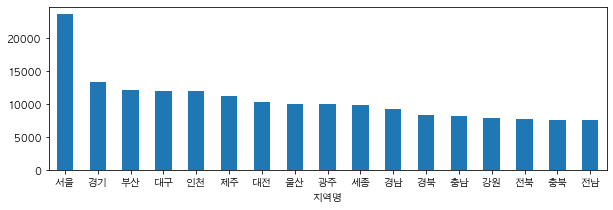

In [22]:
g = df_last.groupby(["지역명"])["평당분양가격"].mean().sort_values(ascending = False)
g.plot.bar(rot = 0, figsize = (10, 3))

<AxesSubplot:xlabel='전용면적'>

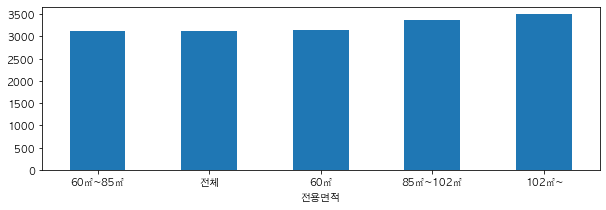

In [23]:
# 전용면적으로 분양가격의 평균을 구하고 막대그래프로 시각화
df_last.groupby(["전용면적"])["분양가격"].mean().sort_values().plot.bar(rot = 0, figsize = (10, 3))

<AxesSubplot:xlabel='연도'>

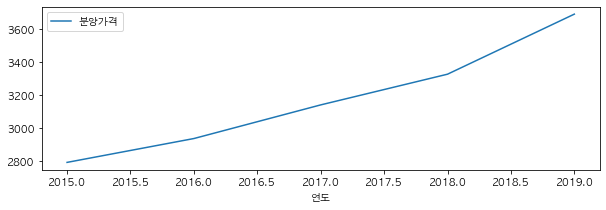

In [24]:
# 연도별 분양가격의 평균을 구하고 막대그래프로 시각화합니다.
pd.pivot_table(df_last, index = '연도', values = '분양가격').plot.line(rot = 0, figsize = (10, 3))

## 1.7.3 box-and-whisker plot | diagram

<AxesSubplot:>

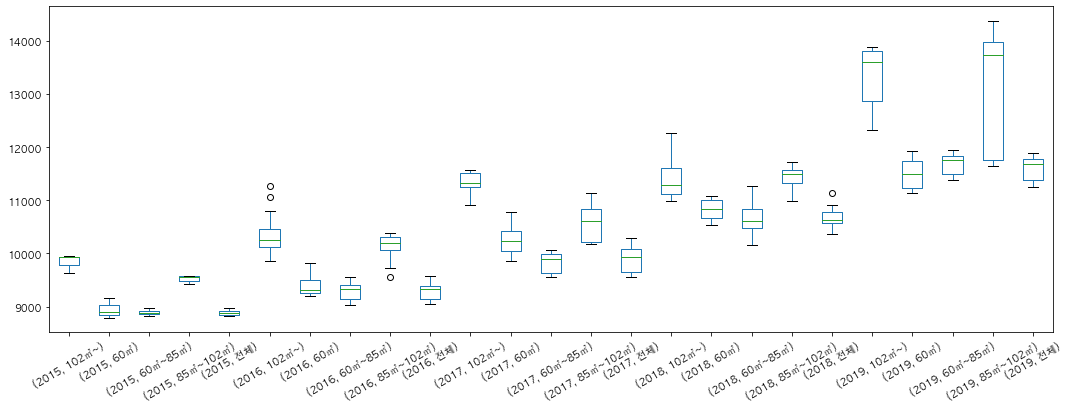

In [25]:
df_last.pivot_table(index = "월", columns = ["연도", "전용면적"], values = "평당분양가격").round().plot.box(figsize = (18, 6), rot = 30)

## 1.7.4 Seaborn으로 시각화 해보기 

In [26]:
df_last.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


In [27]:
import seaborn as sns

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

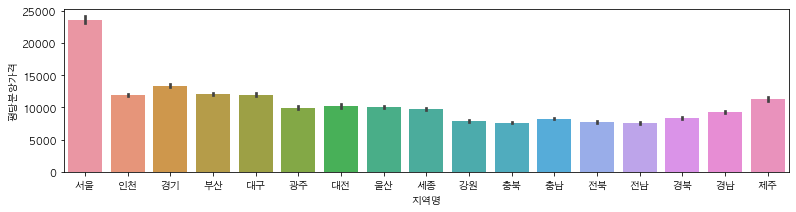

In [28]:
# barplot으로 지역별 평당분양가격 그려보기
plt.figure(figsize = (13, 3))
sns.barplot(x = "지역명", y = "평당분양가격", data = df_last)

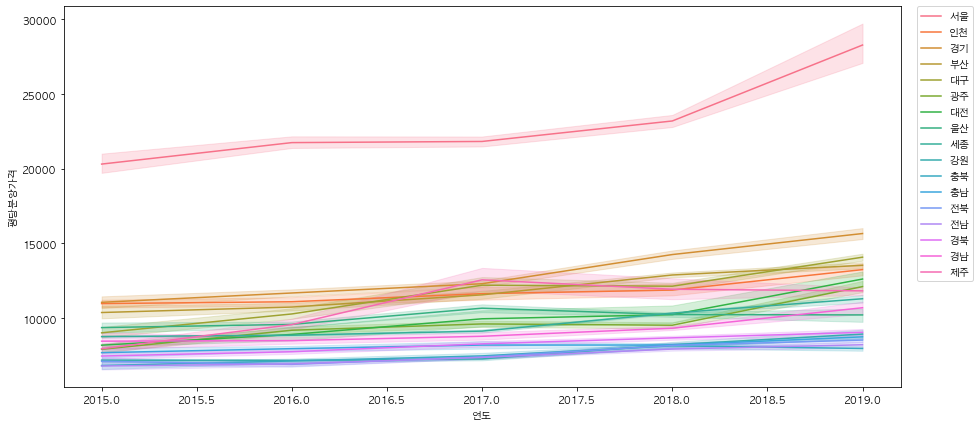

In [29]:
# lineplot으로 연도별 평당분양가격 그려보기
plt.figure(figsize = (15, 7))
sns.lineplot(data =df_last, x = "연도", y = "평당분양가격", hue = "지역명")
plt.legend(bbox_to_anchor = (1.02, 1), loc = 2, borderaxespad=0.)

## 1.7.5 boxplot과 violinplot

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

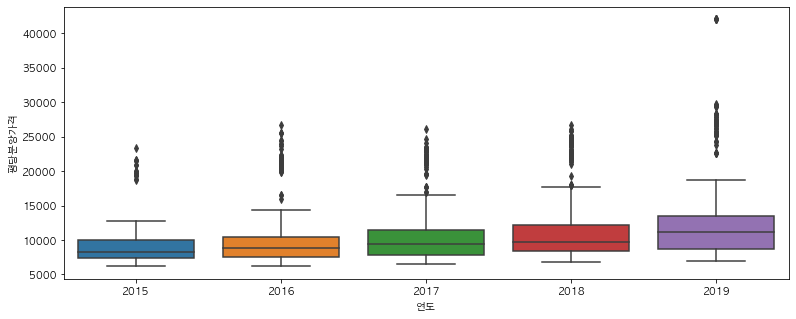

In [31]:
# 연도별 평당분양가격을 boxplot으로 그려봅니다.
plt.figure(figsize = (13, 5))
sns.boxplot(data=df_last, x = '연도', y = '평당분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

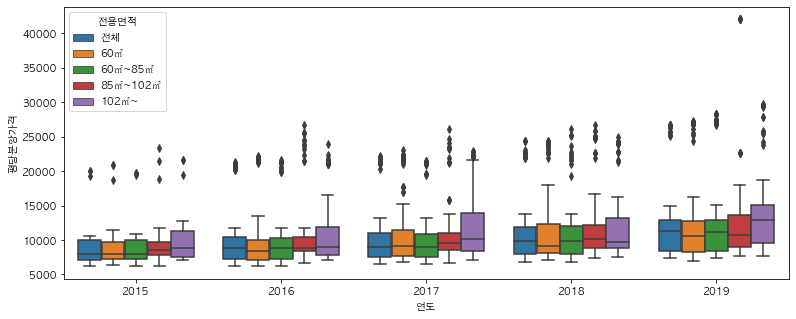

In [32]:
# hue 옵션을 주어 전용면적별로 다르게 표시
plt.figure(figsize = (13, 5))
sns.boxplot(data=df_last, x = '연도', y = '평당분양가격', hue = '전용면적')